In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df_long = pd.read_csv('dataset/oasis_longitudinal.csv')
df_long

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [4]:
df_long.drop(df_long.columns[[0,1,3,4,6]], axis = 1, inplace = True) 
df_long.head()
df_long['SES'].fillna((round(df_long['SES'].mean())), inplace=True)
df_long['MMSE'].fillna((round(df_long['MMSE'].mean())), inplace=True)
df_long['CDR'].fillna((round(df_long['CDR'].mean())), inplace=True)
df_long['eTIV'].fillna((round(df_long['eTIV'].mean())), inplace=True)
df_long['nWBV'].fillna((round(df_long['nWBV'].mean())), inplace=True)
df_long['ASF'].fillna((round(df_long['ASF'].mean())), inplace=True)
df_long['M/F'] = df_long['M/F'].replace('F', 1)
df_long['M/F'] = df_long['M/F'].replace('M', 0)
df_long['Group'] = df_long['Group'].replace('Demented', 1)
df_long['Group'] = df_long['Group'].replace('Nondemented', 0)
df_long['Group'] = df_long['Group'].replace('Converted', 2)

In [5]:
df_long.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [6]:
array=df_long.values
X = array[:,[1,2,3,4,5,6,7,8,9]]
Y = array[:,0]
X_train, X_test, y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

In [7]:
results=dict()

In [8]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
# We can create Python dictionary using [] or dict()
scores = []
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train)
 y_pred = knn.predict(X_test)
 scores.append(accuracy_score(y_test, y_pred))
print(scores)

[0.7066666666666667, 0.68, 0.6666666666666666, 0.64, 0.64, 0.6933333333333334, 0.6533333333333333, 0.6533333333333333, 0.64, 0.6266666666666667, 0.6133333333333333, 0.6533333333333333, 0.6266666666666667, 0.6533333333333333, 0.6533333333333333, 0.6266666666666667, 0.64, 0.64, 0.6266666666666667, 0.6133333333333333, 0.5866666666666667, 0.5466666666666666, 0.5866666666666667, 0.56, 0.5733333333333334]


Text(0, 0.5, 'Testing Accuracy')

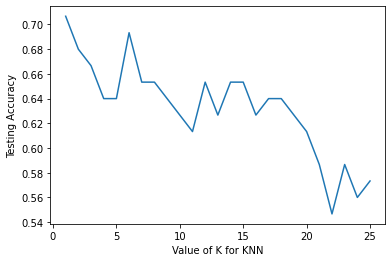

In [9]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [10]:
classifier=KNeighborsClassifier(n_neighbors=1,p=2,metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [11]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[26  6  3]
 [ 7 25  4]
 [ 1  1  2]]


In [12]:
print(accuracy_score(y_test,y_pred))
results.update({"KNN":accuracy_score(y_test,y_pred)})

0.7066666666666667


In [13]:
print(y_pred)
print(X_test[0])
print(X_test[1])
print(X_test[2])

y_pred = classifier.predict([X_test[0]])
print(y_pred)

[0. 1. 1. 2. 1. 0. 0. 2. 1. 2. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 2. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 2.
 0. 0. 0. 0. 0. 1. 2. 0. 1. 0. 1. 2. 2. 1. 0. 2. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1.]
[1.000e+00 7.500e+01 1.300e+01 2.000e+00 2.800e+01 5.000e-01 1.520e+03
 7.080e-01 1.155e+00]
[1.000e+00 8.100e+01 1.200e+01 3.000e+00 2.800e+01 5.000e-01 1.495e+03
 6.870e-01 1.174e+00]
[0.000e+00 7.100e+01 1.600e+01 3.000e+00 2.700e+01 5.000e-01 1.479e+03
 7.500e-01 1.187e+00]
[0.]


In [14]:
y_pred = classifier.predict([[20,10,1,4,0.1,1200,0.7,0.9,1]])
print(y_pred)

[0.]


In [15]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics

In [17]:
svm = SVC(kernel = 'linear', C = 1, gamma = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.update({"SVC":accuracy})
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
[[35  0  0]
 [ 0 34  2]
 [ 1  2  1]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       0.94      0.94      0.94        36
         2.0       0.33      0.25      0.29         4

    accuracy                           0.93        75
   macro avg       0.75      0.73      0.74        75
weighted avg       0.92      0.93      0.93        75



In [18]:
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.update({"DT":accuracy})
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8533333333333334
[[32  0  3]
 [ 1 31  4]
 [ 1  2  1]]
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93        35
         1.0       0.94      0.86      0.90        36
         2.0       0.12      0.25      0.17         4

    accuracy                           0.85        75
   macro avg       0.67      0.68      0.66        75
weighted avg       0.90      0.85      0.87        75



In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.update({"GNB":accuracy_score(y_test,y_pred)})
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9466666666666667
[[35  0  0]
 [ 0 35  1]
 [ 1  2  1]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       0.95      0.97      0.96        36
         2.0       0.50      0.25      0.33         4

    accuracy                           0.95        75
   macro avg       0.81      0.74      0.76        75
weighted avg       0.93      0.95      0.94        75



In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.update({"LR":accuracy_score(y_test,y_pred)})
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8266666666666667
[[33  2  0]
 [ 4 29  3]
 [ 3  1  0]]
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88        35
         1.0       0.91      0.81      0.85        36
         2.0       0.00      0.00      0.00         4

    accuracy                           0.83        75
   macro avg       0.58      0.58      0.58        75
weighted avg       0.82      0.83      0.82        75



C:\Users\shiny\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
rclf = RandomForestClassifier(n_estimators=100,n_jobs=-1)  
rclf.fit(X_train, y_train)
y_pred = rclf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.update({"RF":accuracy_score(y_test,y_pred)})
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
[[35  0  0]
 [ 0 34  2]
 [ 1  2  1]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       0.94      0.94      0.94        36
         2.0       0.33      0.25      0.29         4

    accuracy                           0.93        75
   macro avg       0.75      0.73      0.74        75
weighted avg       0.92      0.93      0.93        75



In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier() 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.update({"XGBoost":accuracy_score(y_test,y_pred)})
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\shiny\anaconda3\envs\project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.96
[[35  0  0]
 [ 0 36  0]
 [ 1  2  1]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       0.95      1.00      0.97        36
         2.0       1.00      0.25      0.40         4

    accuracy                           0.96        75
   macro avg       0.97      0.75      0.79        75
weighted avg       0.96      0.96      0.95        75



In [24]:
from sklearn.ensemble import AdaBoostClassifier

aclf = AdaBoostClassifier(n_estimators=100, random_state=0)  
aclf.fit(X_train, y_train)
y_pred = aclf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.update({"Adaboost":accuracy_score(y_test,y_pred)})
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6
[[15  0 20]
 [ 0 28  8]
 [ 0  2  2]]
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60        35
         1.0       0.93      0.78      0.85        36
         2.0       0.07      0.50      0.12         4

    accuracy                           0.60        75
   macro avg       0.67      0.57      0.52        75
weighted avg       0.92      0.60      0.69        75



In [25]:
print(results)

{'KNN': 0.7066666666666667, 'SVC': 0.9333333333333333, 'DT': 0.8533333333333334, 'GNB': 0.9466666666666667, 'LR': 0.8266666666666667, 'RF': 0.9333333333333333, 'XGBoost': 0.96, 'Adaboost': 0.6}


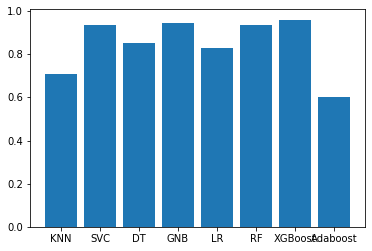

In [26]:
import matplotlib.pyplot as plt
names = list(results.keys())
values = list(results.values())

plt.bar(range(len(results)), values, tick_label=names)
plt.show()

In [27]:
import pickle
pickle.dump(gnb,open("gnb_model.pkl","wb"))